In [1]:
# Análisis Exploratorio de Datos Incial - Turkish Music Emotion Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Carga de Datos

In [2]:
filepath = '/Users/tabotavin/Desktop/MNA-MLOps-Proyecto-Equipo03/data/turkish_music_emotion_modified.csv'
df = pd.read_csv(filepath)

df.shape

(408, 52)

## 2. Inspección Inicial

In [3]:
# Vista previa del dataset
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,mixed_type_col
0,relax,0.052,NaN,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.97,979
1,relax,0.125,0.439,6.680,142.24,4.058,0.516,0.785,0.397,0.556,...,1.000,0.0,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,943
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.746,0.016,1.0,0.413,28.105999999999998,0.134,1.682,0.692,0.963,628
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,1.000,0.161,0.757,error,0.265,0.042,0.354,0.743,0.968,192
4,relax,0.066,0.591,9.769,88.89,3.217,0.228,0.814,0.096,0.434,...,0.404,1.0,0.001,0.345,0.261,0.089,0.748,0.674,0.957,292


In [4]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_5                               

In [5]:
# Resumen estadístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_Lowenergy_Mean,404.0,4.241829,50.714118,0.302,0.52300,0.5535,0.58500,805.528
_Fluctuation_Mean,405.0,9.711723,32.204572,3.987,5.85200,6.7450,7.83800,483.105
_MFCC_Mean_1,402.0,6.270055,37.120651,0.423,1.95875,2.4200,2.90000,565.490
_MFCC_Mean_2,403.0,7.599908,77.807229,-43.608,-0.26700,0.0650,0.41350,946.483
_MFCC_Mean_13,406.0,1.004042,19.712898,-0.620,-0.04400,0.0390,0.10500,397.220
_AttackTime_Slope,402.0,4.055219,49.192974,-0.465,-0.09300,0.0100,0.08975,732.036
_Eventdensity_Mean,405.0,8.865998,67.375263,0.234,1.73700,2.7730,3.74200,998.241
_Pulseclarity_Mean,401.0,4.355584,49.896492,0.011,0.13000,0.2180,0.33100,794.363
_Spectralcentroid_Mean,400.0,4625.624853,21765.211883,606.524,1983.39500,2547.6780,3179.98675,318051.072
_Chromagram_Mean_3,405.0,2.682472,45.699208,0.000,0.08300,0.2990,0.59500,920.000


## 3. Análisis de Calidad de Datos

In [6]:
null_representations = ['NULL', 'NaN', 'nan', 'error', 'invalid', '?', 'ERROR', 'N/A', 'bad', 'unknown']

df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].replace(null_representations, np.nan)

null_counts = df_clean.isnull().sum()
null_percentages = (null_counts / len(df_clean) * 100).round(2)

null_summary = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores_Nulos': null_counts.values,
    'Porcentaje': null_percentages.values
})

null_summary = null_summary[null_summary['Valores_Nulos'] > 0].sort_values('Valores_Nulos', ascending=False)
null_summary.head(10)

,Columna,Valores_Nulos,Porcentaje
51,mixed_type_col,119,29.17
7,_MFCC_Mean_3,12,2.94
16,_MFCC_Mean_12,11,2.70
15,_MFCC_Mean_11,11,2.70
1,_RMSenergy_Mean,10,2.45
4,_Tempo_Mean,9,2.21
9,_MFCC_Mean_5,9,2.21
45,_HarmonicChangeDetectionFunction_Mean,9,2.21
29,_Spectralskewness_Mean,9,2.21
8,_MFCC_Mean_4,8,1.96


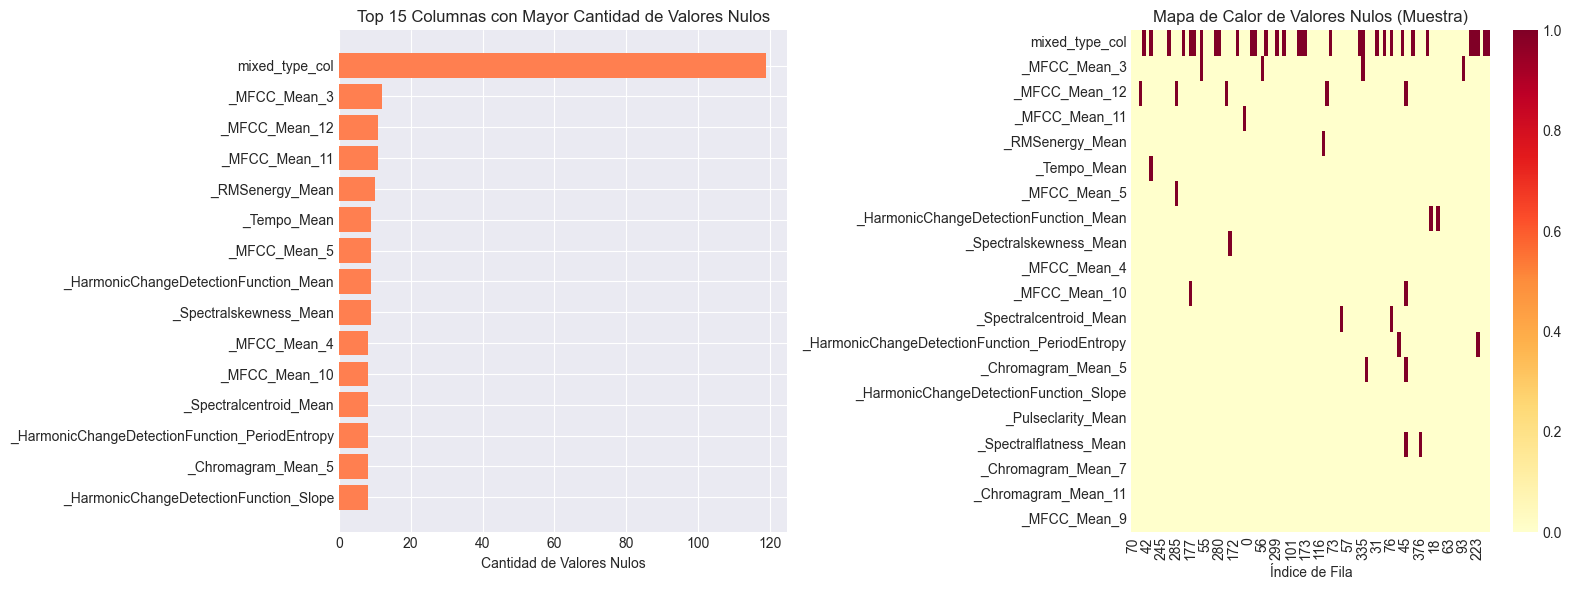

In [7]:
if len(null_summary) > 0:
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    top_nulls = null_summary.head(15)
    ax[0].barh(top_nulls['Columna'], top_nulls['Valores_Nulos'], color='coral')
    ax[0].set_xlabel('Cantidad de Valores Nulos')
    ax[0].set_title('Top 15 Columnas con Mayor Cantidad de Valores Nulos')
    ax[0].invert_yaxis()
    
    cols_with_nulls = null_summary.head(20)['Columna'].tolist()
    null_matrix = df_clean[cols_with_nulls].isnull().astype(int)
    
    if len(null_matrix) > 100:
        null_matrix = null_matrix.sample(100, random_state=42)
    
    sns.heatmap(null_matrix.T, cmap='YlOrRd', cbar=True, ax=ax[1], yticklabels=True)
    ax[1].set_title('Mapa de Calor de Valores Nulos (Muestra)')
    ax[1].set_xlabel('Índice de Fila')
    
    plt.tight_layout()
    plt.show()

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numéricas: {len(numeric_cols)} | Categóricas: {len(categorical_cols)}")
categorical_cols

Numéricas: 14 | Categóricas: 38


['Class',
 '_RMSenergy_Mean',
 '_Tempo_Mean',
 '_MFCC_Mean_3',
 '_MFCC_Mean_4',
 '_MFCC_Mean_5',
 '_MFCC_Mean_6',
 '_MFCC_Mean_7',
 '_MFCC_Mean_8',
 '_MFCC_Mean_9',
 '_MFCC_Mean_10',
 '_MFCC_Mean_11',
 '_MFCC_Mean_12',
 '_Roughness_Mean',
 '_Roughness_Slope',
 '_Zero-crossingrate_Mean',
 '_AttackTime_Mean',
 '_Rolloff_Mean',
 '_Brightness_Mean',
 '_Spectralspread_Mean',
 '_Spectralskewness_Mean',
 '_Spectralkurtosis_Mean',
 '_Spectralflatness_Mean',
 '_EntropyofSpectrum_Mean',
 '_Chromagram_Mean_1',
 '_Chromagram_Mean_2',
 '_Chromagram_Mean_4',
 '_Chromagram_Mean_5',
 '_Chromagram_Mean_7',
 '_Chromagram_Mean_8',
 '_Chromagram_Mean_11',
 '_Chromagram_Mean_12',
 '_HarmonicChangeDetectionFunction_Mean',
 '_HarmonicChangeDetectionFunction_Std',
 '_HarmonicChangeDetectionFunction_Slope',
 '_HarmonicChangeDetectionFunction_PeriodAmp',
 '_HarmonicChangeDetectionFunction_PeriodEntropy',
 'mixed_type_col']

## 4. Análisis de Variable Objetivo

In [9]:
class_dist = df['Class'].value_counts()

for cls, count in class_dist.items():
    pct = (count / len(df) * 100)
    print(f"{cls}: {count} ({pct:.2f}%)")

df['Class'].unique()

relax: 100 (24.51%)
sad: 99 (24.26%)
happy: 98 (24.02%)
angry: 93 (22.79%)
 HAPPY : 4 (0.98%)
 ANGRY : 4 (0.98%)
 SAD : 3 (0.74%)
 RELAX : 2 (0.49%)


array(['relax', ' RELAX ', 'happy', ' HAPPY ', 'sad', ' SAD ', 'angry',
       nan, ' ANGRY '], dtype=object)

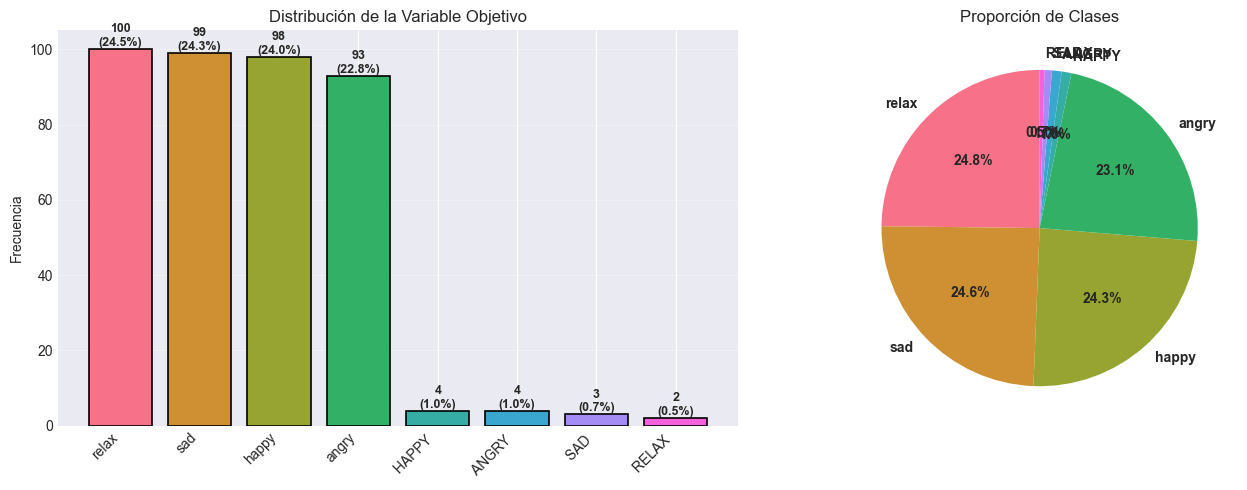

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette("husl", len(class_dist))
bars = ax[0].bar(range(len(class_dist)), class_dist.values, color=colors, edgecolor='black', linewidth=1.2)
ax[0].set_xticks(range(len(class_dist)))
ax[0].set_xticklabels(class_dist.index, rotation=45, ha='right')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Distribución de la Variable Objetivo')
ax[0].grid(axis='y', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, class_dist.values)):
    height = bar.get_height()
    pct = (count / len(df) * 100)
    ax[0].text(bar.get_x() + bar.get_width()/2., height,
              f'{count}\n({pct:.1f}%)',
              ha='center', va='bottom', fontsize=9, fontweight='bold')

ax[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%',
          colors=colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax[1].set_title('Proporción de Clases')

plt.tight_layout()
plt.show()

## 5. Análisis de Variables Numéricas

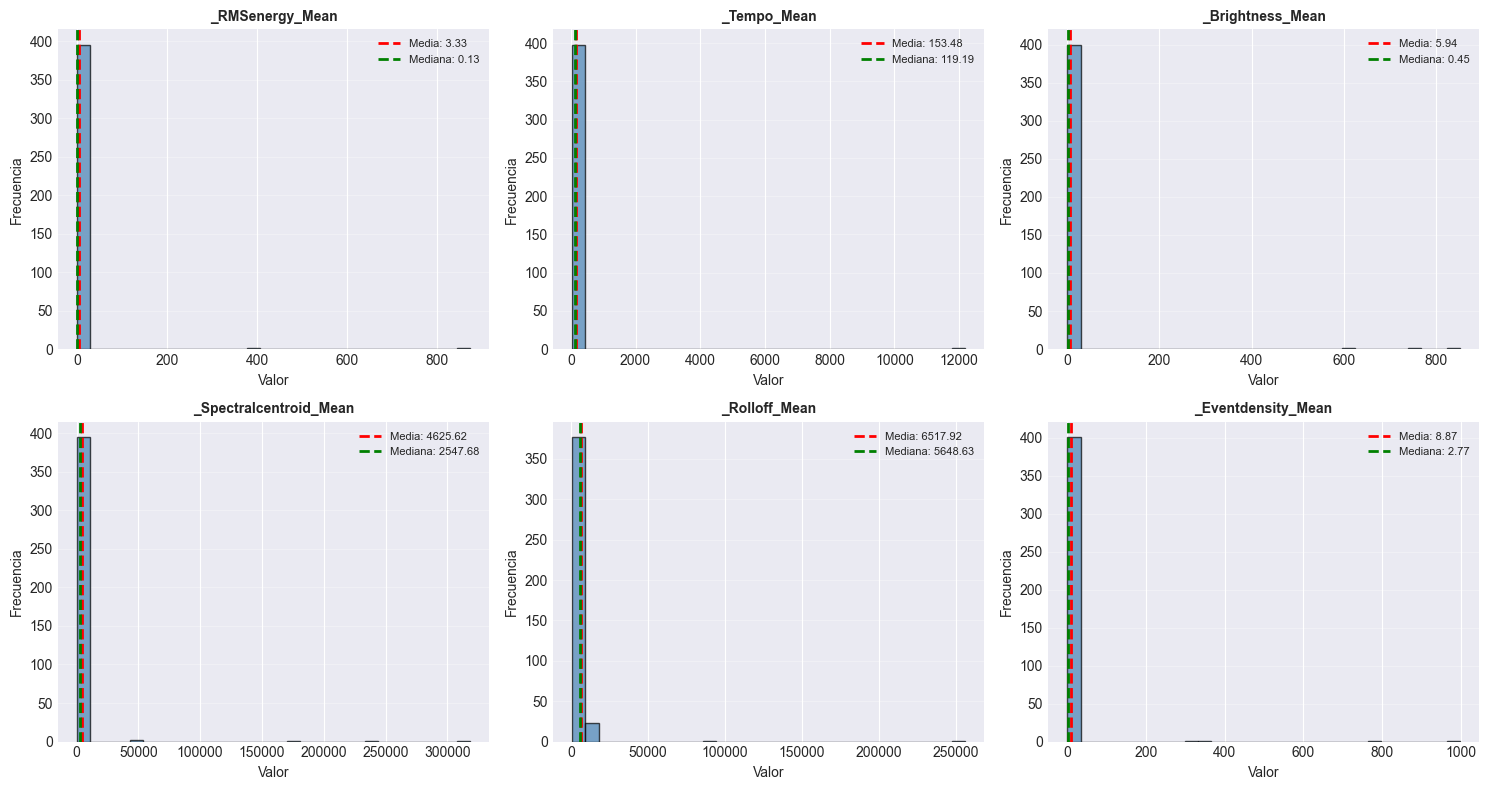

In [11]:
key_features = ['_RMSenergy_Mean', '_Tempo_Mean', '_Brightness_Mean', 
                '_Spectralcentroid_Mean', '_Rolloff_Mean', '_Eventdensity_Mean']

key_features = [col for col in key_features if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    data_numeric = pd.to_numeric(df[col], errors='coerce')
    data_clean = data_numeric.dropna()
    
    axes[idx].hist(data_clean, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(axis='y', alpha=0.3)
    
    mean_val = data_clean.mean()
    median_val = data_clean.median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

## 6. Detección de Outliers

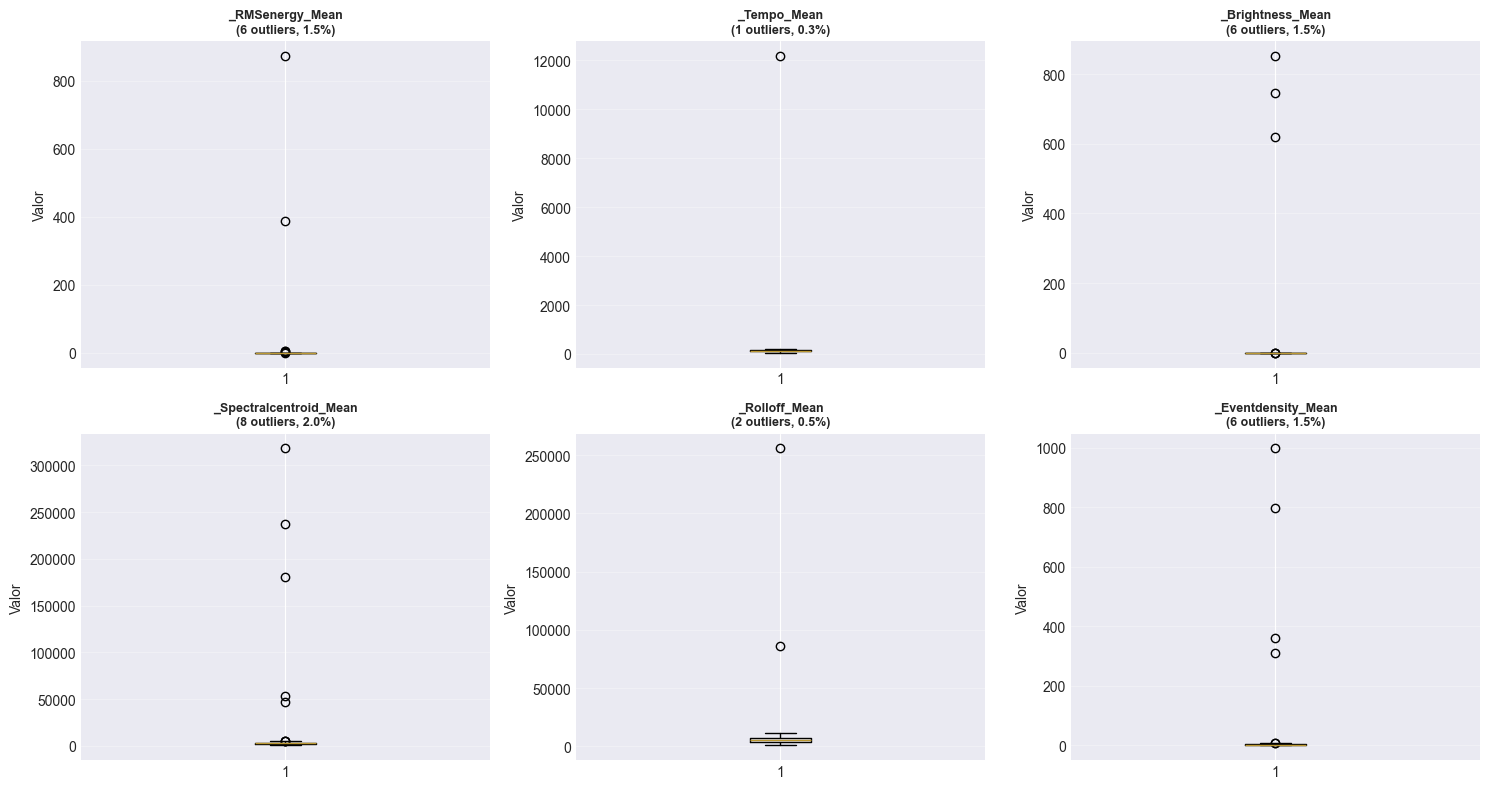

,Variable,N_Outliers,Porcentaje
0,_RMSenergy_Mean,6,1.51%
1,_Tempo_Mean,1,0.25%
2,_Brightness_Mean,6,1.49%
3,_Spectralcentroid_Mean,8,2.00%
4,_Rolloff_Mean,2,0.50%
5,_Eventdensity_Mean,6,1.48%


In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

outlier_summary = []

for idx, col in enumerate(key_features):
    data_numeric = pd.to_numeric(df[col], errors='coerce')
    data_clean = data_numeric.dropna()
    
    Q1 = data_clean.quantile(0.25)
    Q3 = data_clean.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data_clean[(data_clean < lower_bound) | (data_clean > upper_bound)]
    outlier_pct = (len(outliers) / len(data_clean) * 100)
    
    outlier_summary.append({
        'Variable': col,
        'N_Outliers': len(outliers),
        'Porcentaje': f"{outlier_pct:.2f}%"
    })
    
    axes[idx].boxplot(data_clean, vert=True)
    axes[idx].set_title(f'{col}\n({len(outliers)} outliers, {outlier_pct:.1f}%)', 
                      fontsize=9, fontweight='bold')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

pd.DataFrame(outlier_summary)

## 7. Análisis de Correlaciones

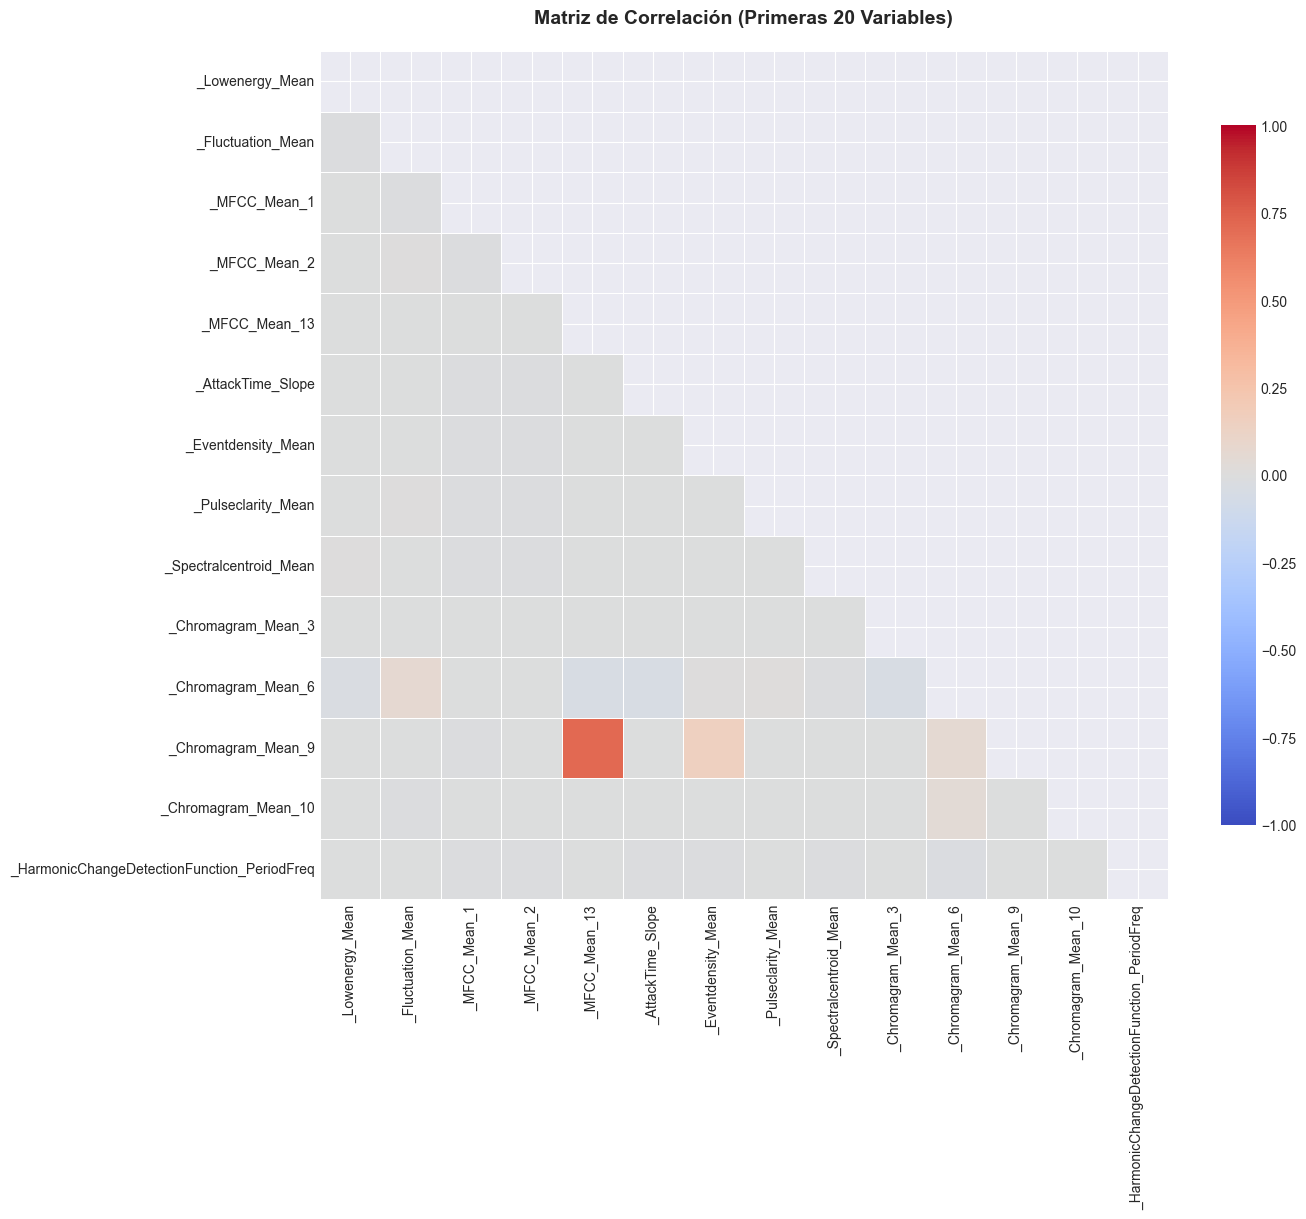

In [13]:
numeric_data = df[numeric_cols].copy()
for col in numeric_data.columns:
    numeric_data[col] = pd.to_numeric(numeric_data[col], errors='coerce')

correlation_matrix = numeric_data.corr()

fig, ax = plt.subplots(figsize=(14, 12))

n_vars = min(20, len(correlation_matrix))
corr_subset = correlation_matrix.iloc[:n_vars, :n_vars]

mask = np.triu(np.ones_like(corr_subset, dtype=bool))

sns.heatmap(corr_subset, mask=mask, annot=False, cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Matriz de Correlación (Primeras 20 Variables)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [14]:
corr_flat = correlation_matrix.abs().unstack()
corr_flat = corr_flat[corr_flat != 1.0]
corr_flat = corr_flat.sort_values(ascending=False)
corr_flat = corr_flat[~corr_flat.index.duplicated(keep='first')]

top_correlations = []
for i, ((var1, var2), corr_val) in enumerate(corr_flat.head(15).items()):
    original_corr = correlation_matrix.loc[var1, var2]
    direction = "positiva" if original_corr > 0 else "negativa"
    top_correlations.append({
        'Ranking': i + 1,
        'Variable_1': var1,
        'Variable_2': var2,
        'Correlación': f"{original_corr:.4f}",
        'Tipo': direction
    })

pd.DataFrame(top_correlations)

,Ranking,Variable_1,Variable_2,Correlación,Tipo
0,1,_Chromagram_Mean_9,_MFCC_Mean_13,0.7152,positiva
1,2,_MFCC_Mean_13,_Chromagram_Mean_9,0.7152,positiva
2,3,_Eventdensity_Mean,_Chromagram_Mean_9,0.1536,positiva
3,4,_Chromagram_Mean_9,_Eventdensity_Mean,0.1536,positiva
4,5,_Fluctuation_Mean,_Chromagram_Mean_6,0.0627,positiva
5,6,_Chromagram_Mean_6,_Fluctuation_Mean,0.0627,positiva
6,7,_Chromagram_Mean_9,_Chromagram_Mean_6,0.0612,positiva
7,8,_Chromagram_Mean_6,_Chromagram_Mean_9,0.0612,positiva
8,9,_MFCC_Mean_13,_Chromagram_Mean_6,-0.0445,negativa
9,10,_Chromagram_Mean_6,_MFCC_Mean_13,-0.0445,negativa


## 8. Análisis Multivariado

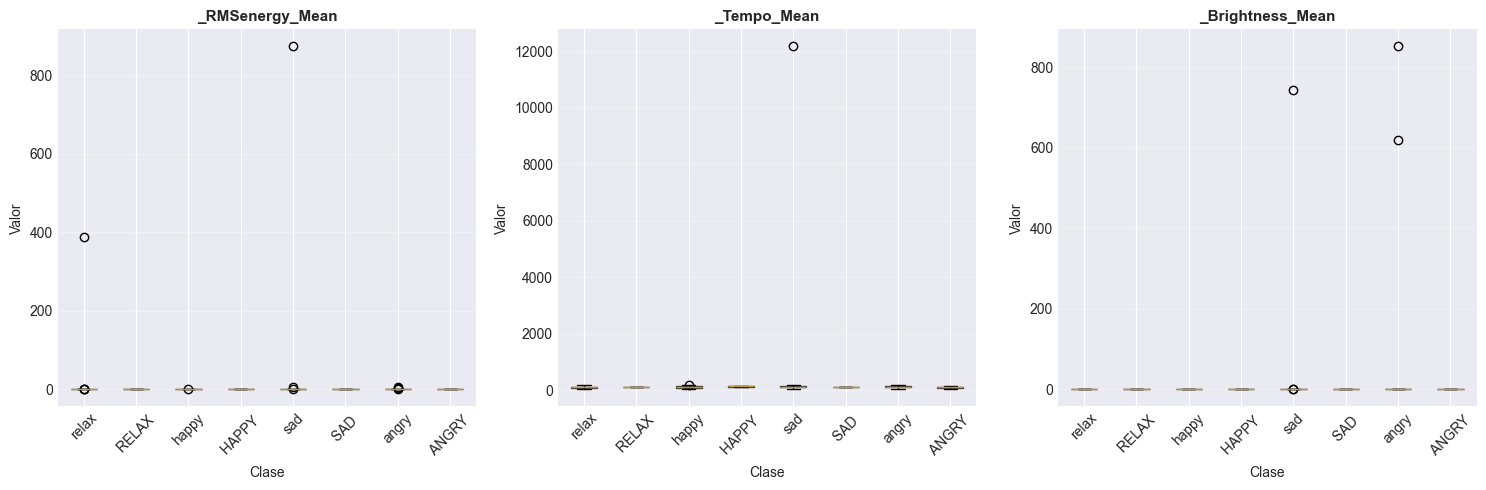

In [15]:
comparison_vars = ['_RMSenergy_Mean', '_Tempo_Mean', '_Brightness_Mean']
comparison_vars = [col for col in comparison_vars if col in df.columns]

fig, axes = plt.subplots(1, len(comparison_vars), figsize=(15, 5))

if len(comparison_vars) == 1:
    axes = [axes]

for idx, var in enumerate(comparison_vars):
    data_by_class = []
    labels = []
    
    for class_name in df['Class'].unique():
        if pd.notna(class_name):
            class_data = pd.to_numeric(df[df['Class'] == class_name][var], errors='coerce').dropna()
            if len(class_data) > 0:
                data_by_class.append(class_data)
                labels.append(class_name)
    
    if len(data_by_class) > 0:
        bp = axes[idx].boxplot(data_by_class, labels=labels, patch_artist=True)
        
        colors = sns.color_palette("husl", len(data_by_class))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[idx].set_title(f'{var}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Clase')
        axes[idx].set_ylabel('Valor')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()